In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import InputLayer, Activation, Dense,BatchNormalization
from keras.layers.noise import AlphaDropout
from keras.utils import to_categorical, plot_model
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop


11490434/11490434 [==============================] - 2s 0us/step
X_TRAIN shape --> (60000, 784)
Y_TRAIN shape --> (60000, 10)
X_TEST shape --> (10000, 784)
Y_TEST shape --> (10000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 alpha_dropout (AlphaDropout  (None, 128)              0         
 )                                                               
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
   

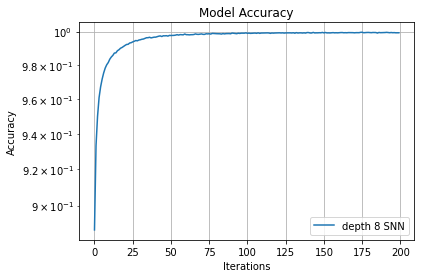

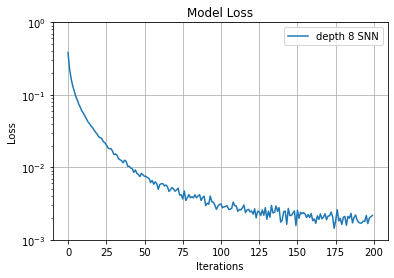

In [2]:
list = [2]
(X_TRAIN, Y_TRAIN), (X_TEST, Y_TEST) = mnist.load_data()
X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0], -1).astype('float32') / 255
X_TEST = X_TEST.reshape(X_TEST.shape[0], -1).astype('float32') / 255
BATCH = 128
EPOCHS = 200
N_CLASSES = len(np.unique(Y_TRAIN))
Y_TRAIN = to_categorical(Y_TRAIN, N_CLASSES)
Y_TEST = to_categorical(Y_TEST, N_CLASSES)
print('X_TRAIN shape --> {0}'.format(X_TRAIN.shape))
print('Y_TRAIN shape --> {0}'.format(Y_TRAIN.shape))
print('X_TEST shape --> {0}'.format(X_TEST.shape))
print('Y_TEST shape --> {0}'.format(Y_TEST.shape))
IMG_SHAPE = X_TRAIN[0].shape

for i in list:
    
    MODEL = Sequential()
    MODEL.add(InputLayer(input_shape=IMG_SHAPE))
    for j in range(0,i-1):
        #MODEL.add(Dense(128,activation='relu'))
        #MODEL.add(BatchNormalization())
        MODEL.add(Dense(128, kernel_initializer='random_normal'))
        MODEL.add(Activation('selu'))
        MODEL.add(AlphaDropout(0.05))
    MODEL.add(Dense(N_CLASSES))
    MODEL.add(Activation('softmax'))

    MODEL.summary()

    plot_model(MODEL)



    MODEL.compile(loss=categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=["acc"])

    HIST_MODEL = MODEL.fit(X_TRAIN, Y_TRAIN,
                           batch_size=BATCH,
                           epochs=EPOCHS,
                           verbose=True,
                           validation_data=(X_TEST, Y_TEST))


    LOSS, ACCURACY = MODEL.evaluate(X_TEST, Y_TEST, verbose=False)
    print('Test Loss {0}'.format(LOSS))
    print('Test Accuracy {0}'.format(ACCURACY))

    plt.figure("accuracy")
    plt.plot(HIST_MODEL.history['acc'])
    plt.title('Model Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1])
    plt.yscale("log")
    plt.grid()
    plt.legend(['depth 8 SNN','depth 16 SNN','depth 32 SNN'], loc='lower right')

    
    plt.figure("Loss")
    val = HIST_MODEL.history['loss']

    plt.plot(val)
    #plt.plot(HIST_MODEL.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.yscale("log")
    plt.yticks([1e-3,1e-2,1e-1,1])
    plt.grid()
    plt.legend([ 'depth 8 SNN','depth 16 SNN','depth 32 SNN'], loc='upper right')
  
plt.show()
